In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,62.0,703,1134,3081,4020,1419,1530,11887,0,0
1,종로구,사직동,13,8,0,4,1,14,1,0,...,62.0,532,681,2643,3037,1212,1274,9379,2,0
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,58.0,121,218,646,814,432,428,2659,1,0
3,종로구,부암동,1,1,0,0,1,3,0,0,...,62.0,453,844,2575,3184,1311,1223,9590,0,0
4,종로구,평창동,4,0,0,0,2,5,0,0,...,62.0,1119,1550,4381,5911,2715,2276,17952,0,0
5,종로구,무악동,2,0,0,0,0,3,0,0,...,71.0,594,943,1721,2792,1048,986,8084,0,0
6,종로구,교남동,3,0,0,0,0,7,1,0,...,65.0,788,824,2691,3438,1188,1119,10048,1,0
7,종로구,가회동,2,0,0,1,0,4,0,0,...,62.0,190,308,997,1405,581,605,4086,0,0
8,종로구,"종로1,2,3,4가동",44,9,0,8,5,39,0,1,...,70.0,350,408,2586,2670,1382,1123,8519,4,3
9,종로구,"종로5,6가동",13,12,0,3,2,15,0,2,...,69.0,92,208,2249,1450,778,732,5509,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             426 non-null    object 
 1   행정동             426 non-null    object 
 2   갈비/삼겹살          426 non-null    int64  
 3   곱창/양구이전문        426 non-null    int64  
 4   기사식당            426 non-null    int64  
 5   기타고기요리          426 non-null    int64  
 6   냉면집             426 non-null    int64  
 7   닭/오리요리          426 non-null    int64  
 8   돌솥/비빕밥전문점       426 non-null    int64  
 9   두부요리전문          426 non-null    int64  
 10  버섯전문점           426 non-null    int64  
 11  별식/퓨전요리         426 non-null    int64  
 12  보리밥전문           426 non-null    int64  
 13  부대찌개/섞어찌개       426 non-null    int64  
 14  부페              426 non-null    int64  
 15  분식              426 non-null    int64  
 16  설렁탕집            426 non-null    int64  
 17  순두부전문           426 non-null    int

- 총 72개의 컬럼, 결측치는 존재하지 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,상관계수,변수,업종


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 서울시 전체**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,136514.381005,41904.347345,49391.349795,447607.545400,31067.879313,44347.353600,129714.713550,145618.426113,45975.082438,50884.092138
1,종로구,사직동,13,8,0,4,1,14,1,0,...,253453.844509,57569.566868,50456.207741,480448.597038,26871.443813,33437.563512,162617.914638,156707.815788,50622.256525,50191.601875
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,46193.605655,14393.212745,13403.011518,136689.733850,5577.277400,10146.916438,49880.929312,43118.948212,15346.331337,12619.330763
3,종로구,부암동,1,1,0,0,1,3,0,0,...,104282.973436,39364.520668,42448.044036,333707.809238,17655.709338,34937.316238,83895.526762,112291.436075,40618.802738,44309.019013
4,종로구,평창동,4,0,0,0,2,5,0,0,...,138908.729014,60519.324000,62203.008986,456256.354350,28486.924663,44148.969487,98373.248138,156083.806237,64282.090700,64881.317288


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.663073,0.484329,0.015933,0.488160,0.391792,0.653257,0.356521,0.198478,0.029176,0.738821,...,0.564815,0.661273,0.208840,0.749461,0.238631,0.778677,0.752952,0.415670,0.592066,0.267811
10대 미만 생활인구_평일,0.084683,0.043809,-0.033244,0.036611,0.056176,0.257595,0.057072,0.033101,0.051360,0.123222,...,0.181098,0.085374,0.096161,0.126286,-0.013876,0.267006,0.106967,0.067305,0.087495,0.110080
10대 생활인구_평일,0.161462,0.115070,-0.040612,0.096746,0.144469,0.290444,0.150431,0.053895,0.021964,0.230154,...,0.196676,0.188621,0.044397,0.281794,0.040814,0.422456,0.216941,0.174472,0.108004,0.114776
20~30대 생활인구_평일,0.743052,0.556135,0.015113,0.539834,0.385394,0.638573,0.381153,0.179647,0.028182,0.811906,...,0.578928,0.735749,0.167512,0.852514,0.233836,0.820346,0.840520,0.454182,0.612659,0.248437
40~50대 생활인구_평일,0.635479,0.439344,0.022612,0.497986,0.411890,0.608956,0.351446,0.215301,0.022233,0.726170,...,0.532708,0.659927,0.212905,0.722649,0.226580,0.726252,0.742081,0.416727,0.623642,0.292035
60대 생활인구_평일,0.550302,0.415929,0.045300,0.406451,0.360895,0.634459,0.279150,0.217344,0.020072,0.571045,...,0.530478,0.505784,0.304639,0.496192,0.322970,0.579339,0.557881,0.285196,0.540816,0.219250
70대 이상 생활인구_평일,0.406442,0.331178,0.056616,0.268999,0.292381,0.569474,0.206457,0.195960,0.003833,0.417786,...,0.443263,0.333421,0.263621,0.334825,0.290928,0.456028,0.408061,0.196143,0.407109,0.176208
총생활인구수_주말,0.608314,0.483290,0.030040,0.396689,0.336672,0.654131,0.294950,0.165699,0.039009,0.638253,...,0.554279,0.560772,0.220201,0.633795,0.234547,0.713994,0.647856,0.326428,0.503214,0.216639
10대 미만 생활인구_주말,0.162597,0.111498,-0.025644,0.096628,0.108639,0.318773,0.101008,0.047992,0.043251,0.208132,...,0.244115,0.163690,0.117866,0.202440,0.010819,0.332143,0.194544,0.099127,0.156788,0.134195
10대 생활인구_주말,0.233400,0.187529,-0.033186,0.142145,0.189702,0.339668,0.178873,0.056452,0.011586,0.307588,...,0.258881,0.253457,0.062790,0.349681,0.066499,0.468745,0.298934,0.193323,0.168253,0.140428


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_평일,0.743052
1,갈비/삼겹살,20~30대 생활인구_주말,0.742392
2,갈비/삼겹살,총생활인구수_평일,0.663073
3,갈비/삼겹살,40~50대 생활인구_평일,0.635479
4,갈비/삼겹살,총생활인구수_주말,0.608314
...,...,...,...
211,해장국/감자탕,총생활인구수_주말,0.503214
212,해장국/감자탕,40~50대 생활인구_주말,0.489574
213,해장국/감자탕,60대 생활인구_주말,0.455187
214,해장국/감자탕,70대 이상 생활인구_평일,0.407109


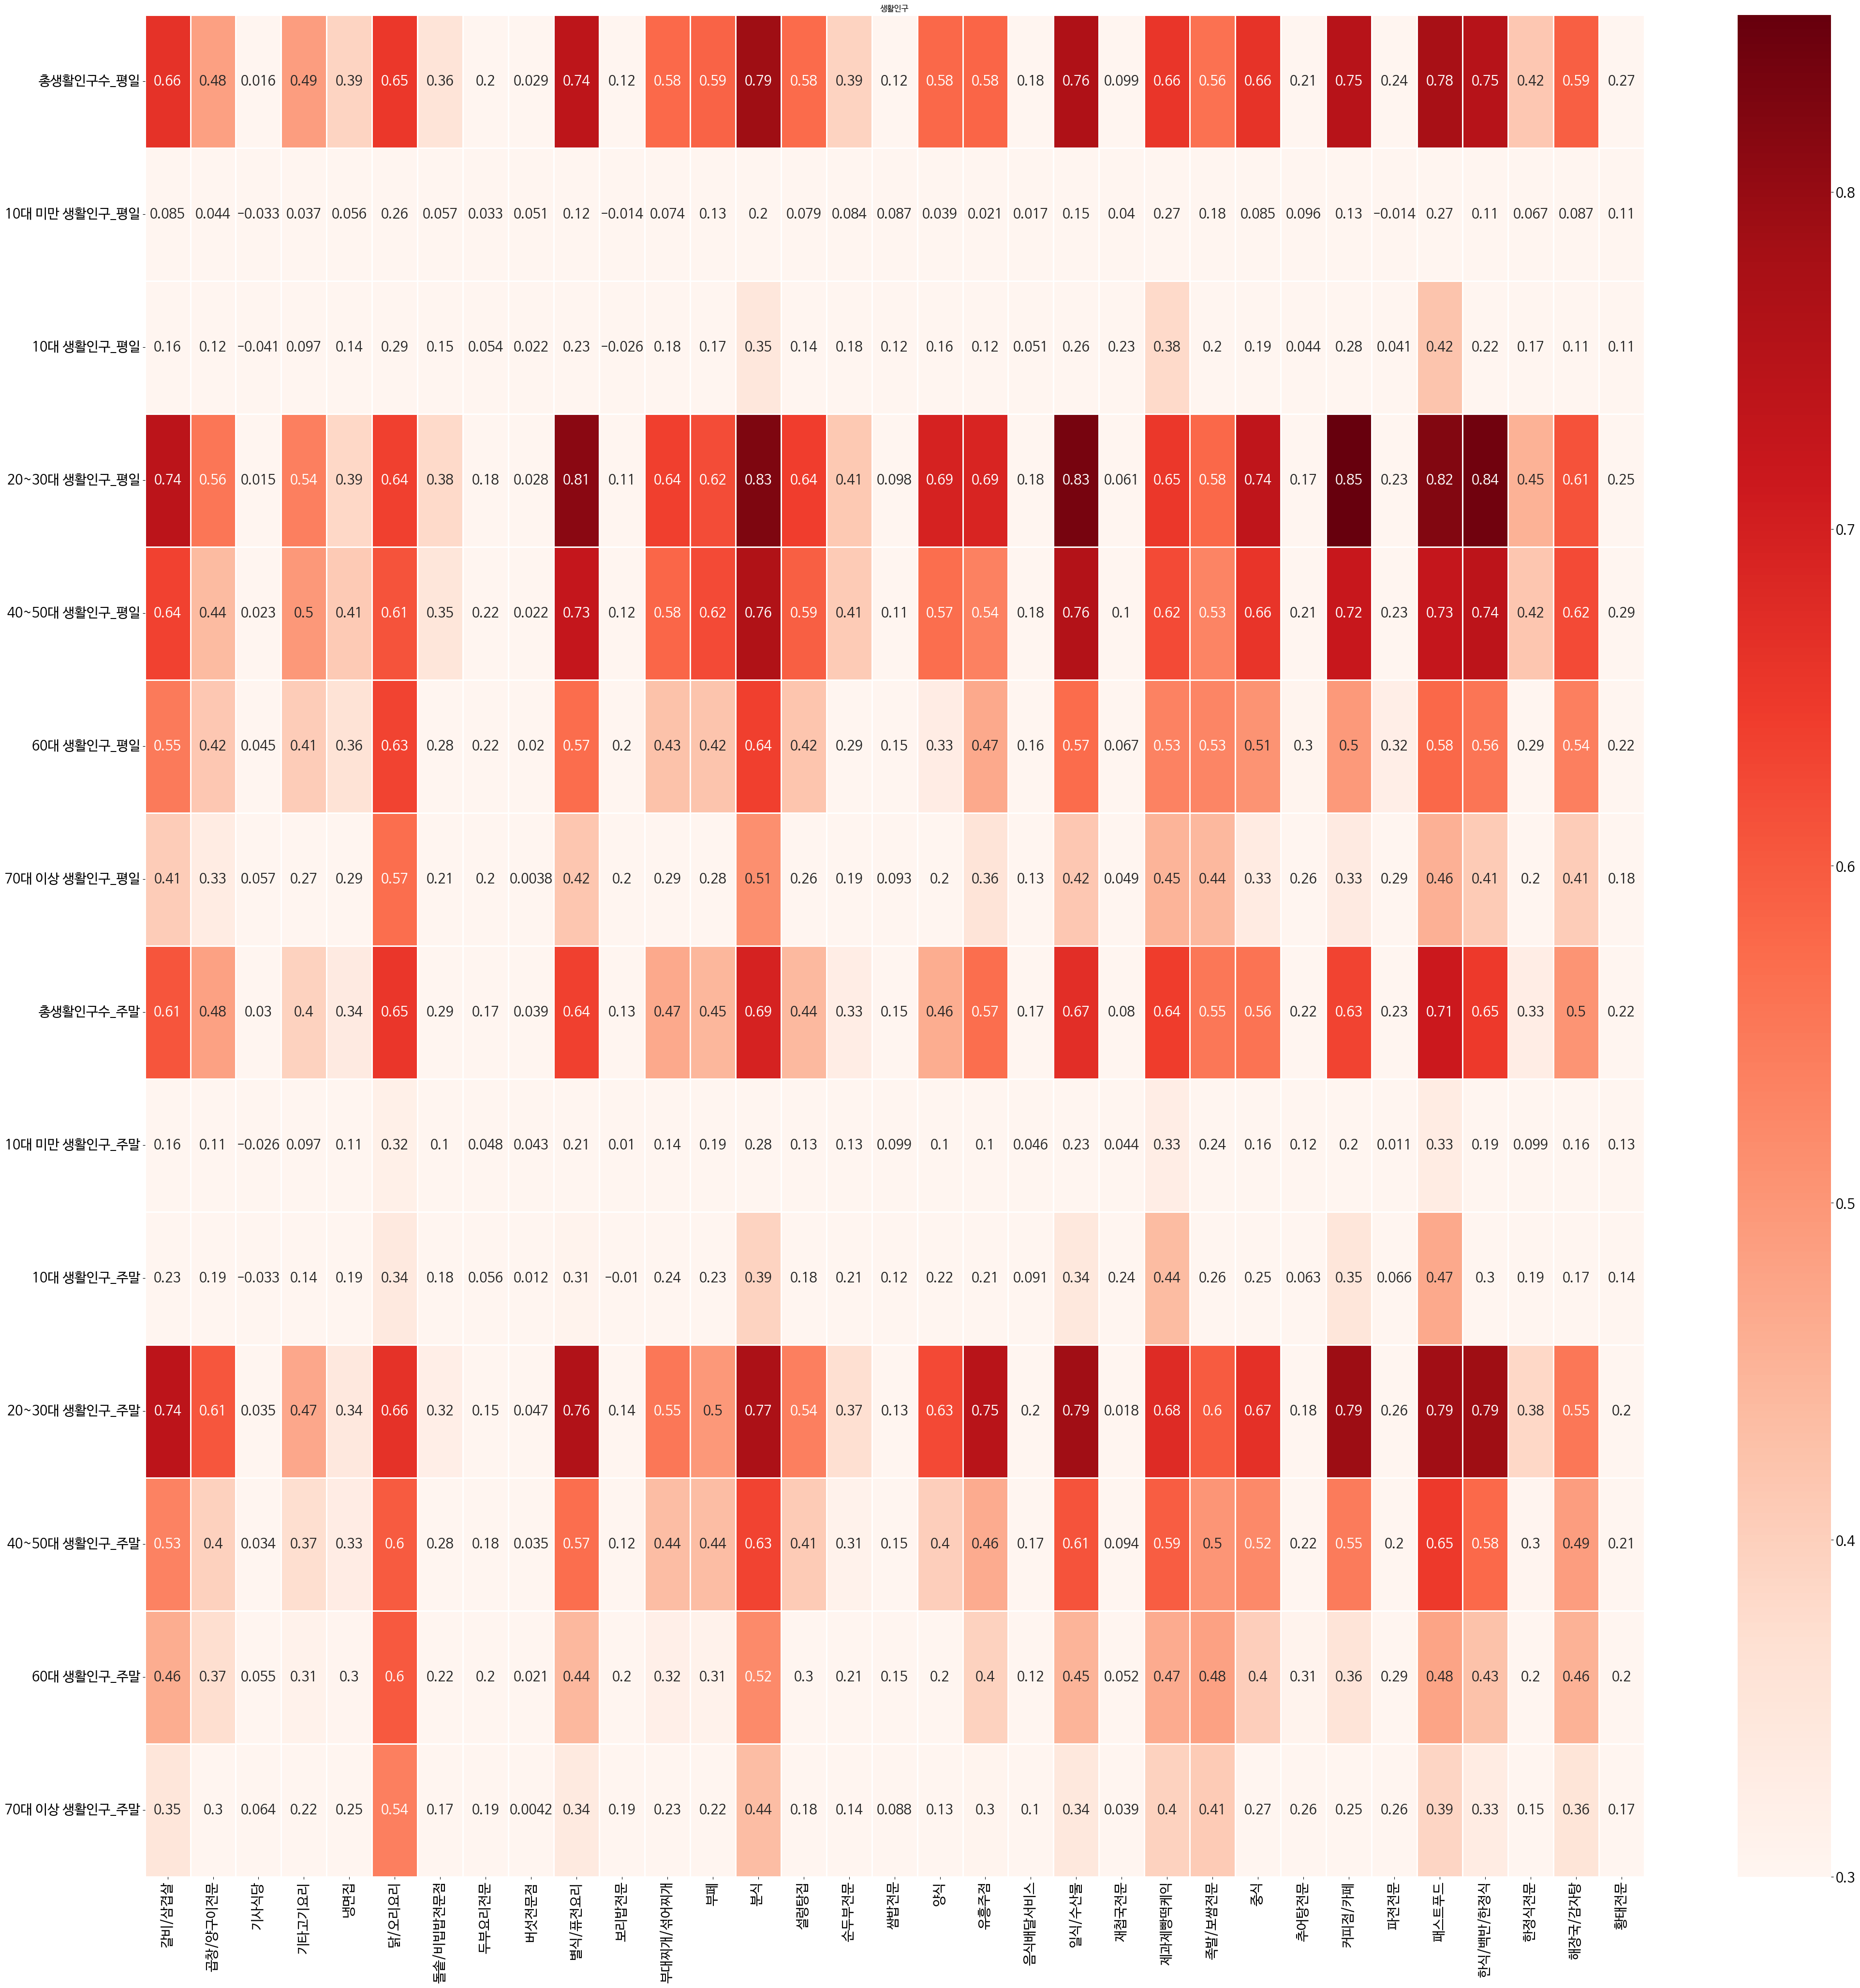

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살       10
곱창/양구이전문     10
기타고기요리        8
냉면집           8
닭/오리요리       12
돌솥/비빕밥전문점     4
별식/퓨전요리      11
부대찌개/섞어찌개     8
부페            8
분식           12
설렁탕집          7
순두부전문         6
양식            7
유흥주점         10
일식/수산물       11
제과제빵떡케익      13
족발/보쌈전문      10
중식            9
추어탕전문         2
커피점/카페       10
파전전문          1
패스트푸드        13
한식/백반/한정식    10
한정식전문         6
해장국/감자탕      10
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,50,0,7,71,0,2,0,1,1,0
1,종로구,사직동,13,8,0,4,1,14,1,0,...,131,0,14,207,1,6,0,0,0,0
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,95,0,8,49,1,0,0,0,0,0
3,종로구,부암동,1,1,0,0,1,3,0,0,...,54,0,10,27,0,0,0,1,1,0
4,종로구,평창동,4,0,0,0,2,5,0,0,...,51,0,7,41,0,1,0,0,0,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),0.034558,0.083889,0.062282,-0.018769,-0.025915,0.079514,0.069044,0.014525,-0.046161,0.058929,...,0.012721,0.062405,0.045469,0.106045,0.063327,0.139710,0.065555,0.050302,0.000680,-0.031587
일반대학,0.045407,0.081198,0.076313,-0.011425,-0.023932,0.071641,0.084807,0.018551,-0.044007,0.064594,...,0.001194,0.064599,0.050096,0.114074,0.062107,0.144594,0.067052,0.069719,0.000971,-0.038846
온라인대학,-0.040806,0.006679,-0.034783,-0.037387,-0.042695,0.022010,-0.039239,-0.046288,-0.015077,0.004387,...,0.004820,0.008220,0.006064,-0.007039,-0.027664,0.009847,-0.000995,-0.054404,-0.005245,0.027291


In [15]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수


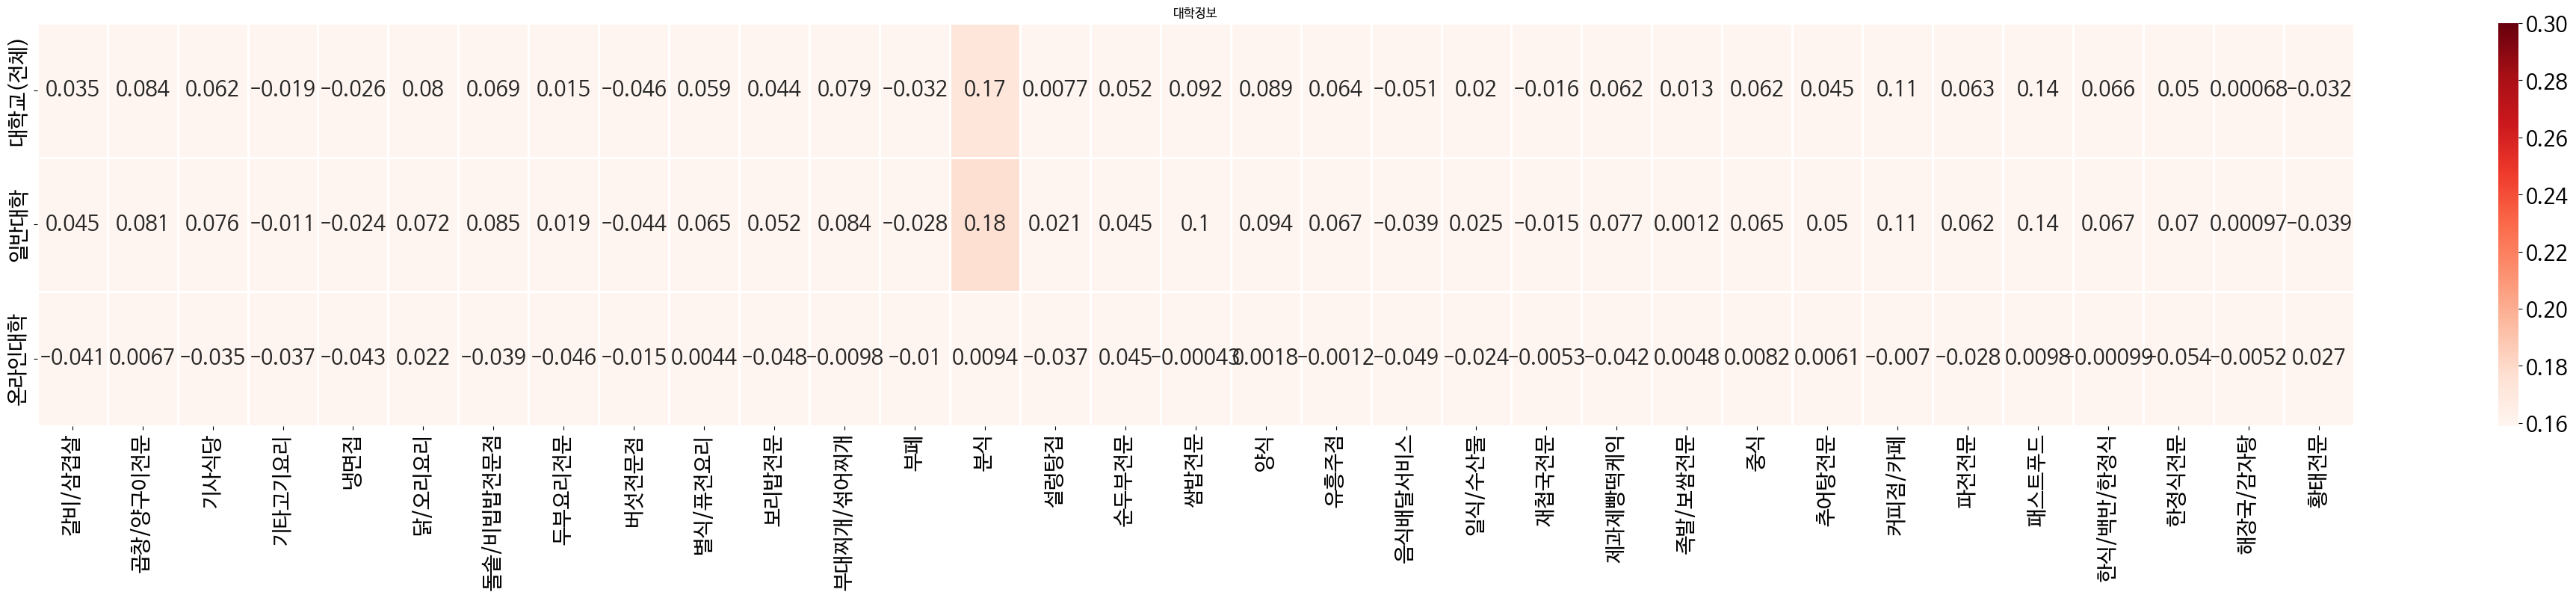

In [16]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 각 업종들과의 상관계수가 0.3 이상인 변수가 존재하지 않는다.
- 대학정보 데이터는 각 업종의 업소 수와 상관관계가 거의 없다고 할 수 있다.

### **c) 초중고학교정보**

In [17]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,0,7,71,0,2,0,6,1,2,3
1,종로구,사직동,13,8,0,4,1,14,1,0,...,0,14,207,1,6,0,1,1,0,0
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,0,8,49,1,0,0,2,0,1,1
3,종로구,부암동,1,1,0,0,1,3,0,0,...,0,10,27,0,0,0,4,2,1,1
4,종로구,평창동,4,0,0,0,2,5,0,0,...,0,7,41,0,1,0,1,0,0,1


In [18]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),-0.065979,-0.083797,-0.030280,-0.076489,-0.033815,0.067744,0.020434,0.109387,0.016935,-0.029796,...,-0.045969,-0.028390,0.033565,0.007661,0.004913,0.087589,-0.037265,0.044941,-0.068414,0.093441
초등학교,0.008015,-0.018955,-0.039368,-0.037791,-0.061140,0.161274,0.036145,0.107795,0.011044,0.019275,...,0.033034,0.006121,0.104600,0.011833,0.053384,0.111565,-0.010653,0.035201,-0.003674,0.011467
중학교,-0.072956,-0.088876,0.014122,-0.057505,-0.018666,0.005318,-0.019977,0.035719,-0.005840,-0.059338,...,-0.079173,-0.045536,0.017274,-0.007710,0.012186,0.044103,-0.045126,0.034261,-0.087174,0.116476
고등학교,-0.091658,-0.092528,-0.042044,-0.085255,-0.002093,-0.004904,0.028245,0.111048,0.031979,-0.033781,...,-0.065564,-0.030048,-0.037653,0.012371,-0.048979,0.052457,-0.034379,0.037623,-0.074236,0.097574


In [19]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수


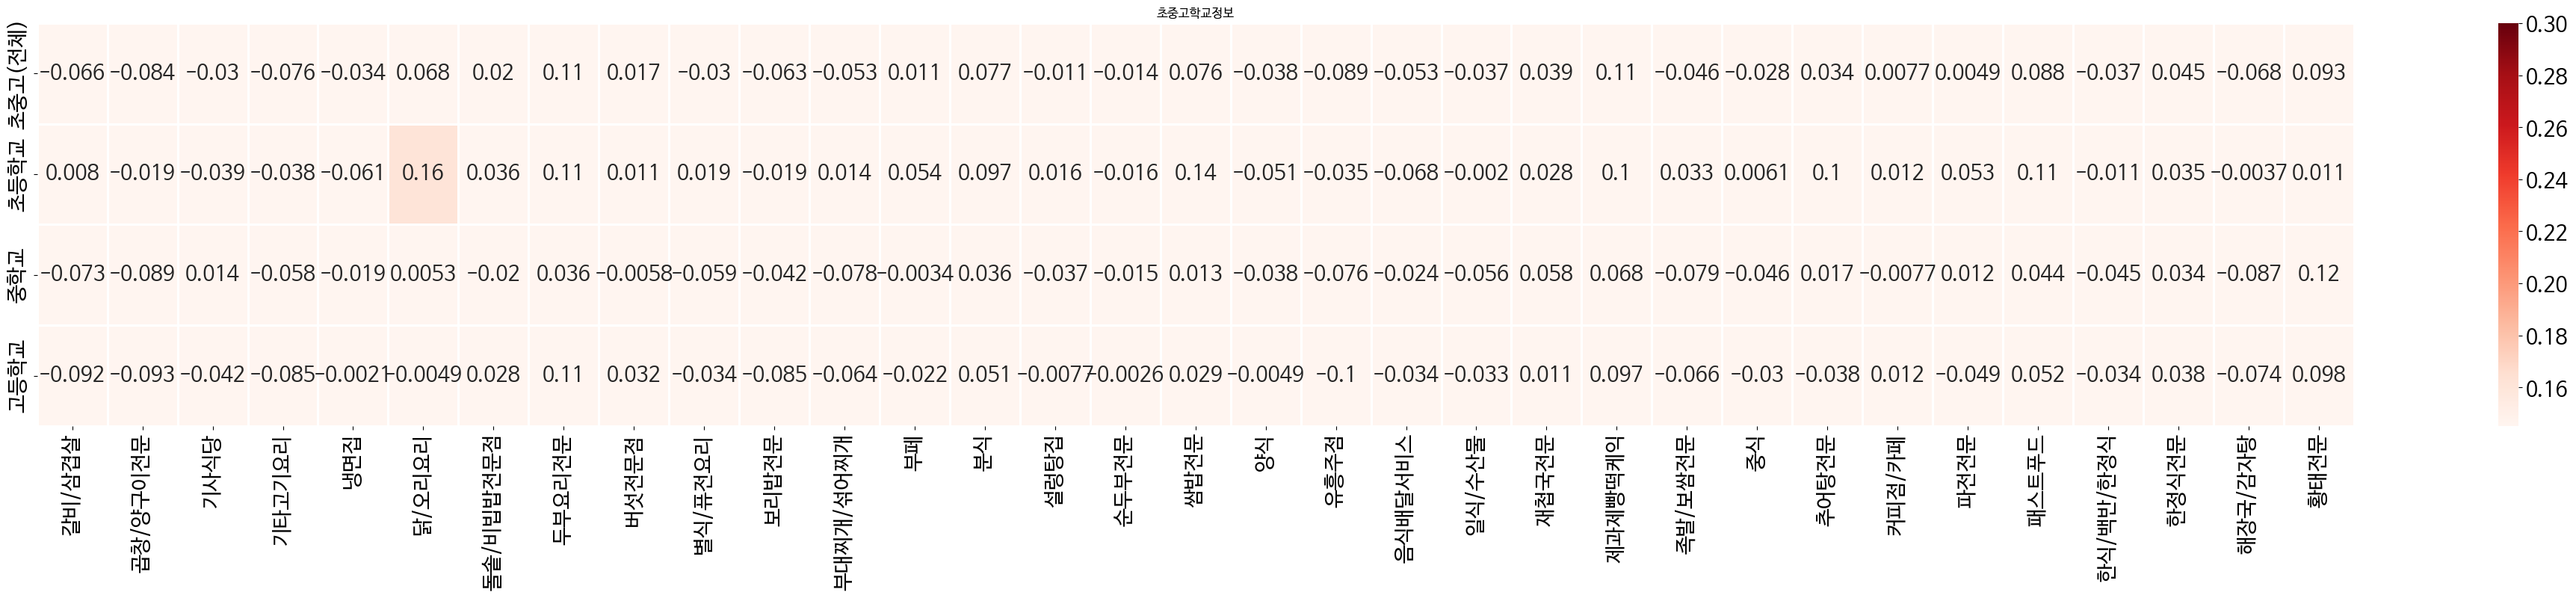

In [20]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 각 업종들과의 상관계수가 0.3 이상인 변수가 존재하지 않는다.
- 초중고학교정보 데이터는 각 업종의 업소 수와 상관관계가 거의 없다고 할 수 있다.

### **d) 소득정보**

In [21]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,0,7,71,0,2,0,11680,4715,2.48,5918.110000
1,종로구,사직동,13,8,0,4,1,14,1,0,...,0,14,207,1,6,0,8705,3969,2.19,6334.032500
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,0,8,49,1,0,0,2433,1065,2.28,5499.561429
3,종로구,부암동,1,1,0,0,1,3,0,0,...,0,10,27,0,0,0,9666,3901,2.48,5256.250000
4,종로구,평창동,4,0,0,0,2,5,0,0,...,0,7,41,0,1,0,17379,6398,2.72,8318.690000


In [22]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.253602,0.197656,0.058206,0.123047,0.107182,0.468040,0.118997,0.178697,0.058740,0.187394,...,0.329727,0.221659,0.190808,0.156428,0.083754,0.361580,0.180793,0.084510,0.228351,0.103342
총가구수,0.428150,0.359953,0.089806,0.245246,0.175424,0.584544,0.161379,0.211583,0.074320,0.331261,...,0.457718,0.350319,0.231869,0.288144,0.174310,0.471236,0.335675,0.154943,0.355296,0.120487
가구당인구수,-0.418122,-0.403803,-0.092226,-0.286255,-0.185041,-0.314854,-0.083723,-0.104395,-0.029995,-0.365999,...,-0.329899,-0.305130,-0.151864,-0.316817,-0.253784,-0.257132,-0.388263,-0.164156,-0.350362,-0.033078
평균소득금액,0.196996,0.058694,-0.076420,0.176455,0.146622,0.036237,0.086977,-0.036365,0.074971,0.249512,...,0.098425,0.227613,-0.086174,0.384952,-0.033639,0.315549,0.323504,0.172243,0.122206,0.088307


In [23]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.428150
1,갈비/삼겹살,가구당인구수,-0.418122
2,곱창/양구이전문,총가구수,0.359953
3,곱창/양구이전문,가구당인구수,-0.403803
4,닭/오리요리,총가구수,0.584544
5,닭/오리요리,총인구수,0.468040
6,닭/오리요리,가구당인구수,-0.314854
7,별식/퓨전요리,총가구수,0.331261
8,별식/퓨전요리,가구당인구수,-0.365999
9,부대찌개/섞어찌개,가구당인구수,-0.308553


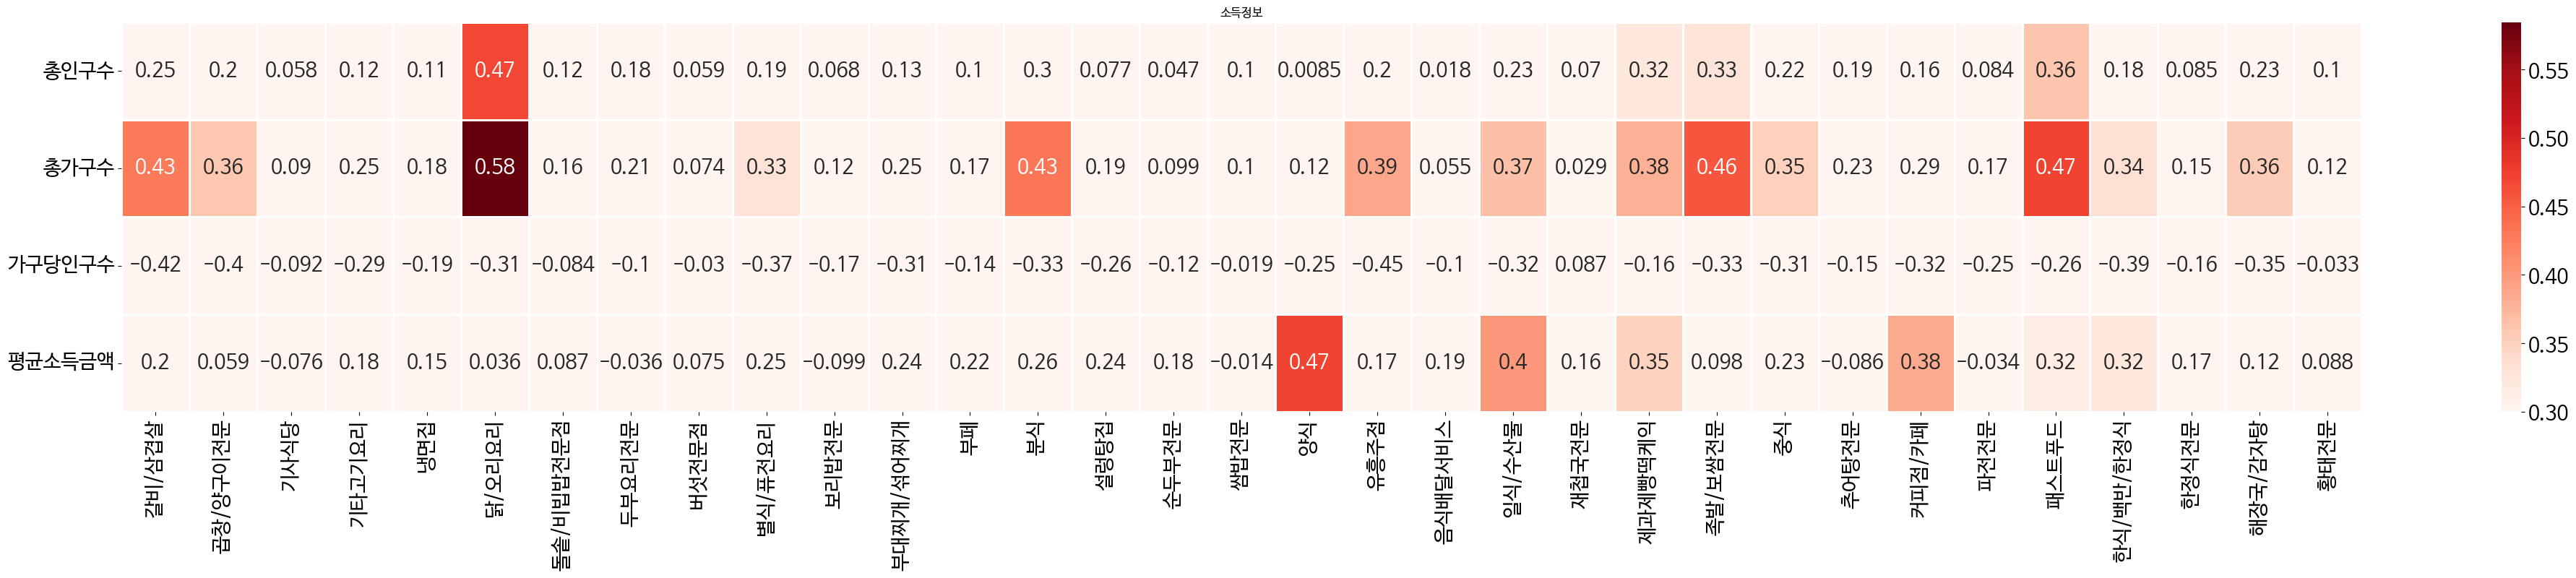

In [24]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [25]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
닭/오리요리       3
별식/퓨전요리      2
부대찌개/섞어찌개    1
분식           3
양식           1
유흥주점         2
일식/수산물       3
제과제빵떡케익      3
족발/보쌈전문      3
중식           2
커피점/카페       2
패스트푸드        3
한식/백반/한정식    3
해장국/감자탕      2
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 상당수의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **e) 상권변화지표**

In [26]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,50,0,7,71,0,2,0,LH,107.0,62.0
1,종로구,사직동,13,8,0,4,1,14,1,0,...,131,0,14,207,1,6,0,HH,135.0,62.0
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,95,0,8,49,1,0,0,LH,105.0,58.0
3,종로구,부암동,1,1,0,0,1,3,0,0,...,54,0,10,27,0,0,0,LH,103.0,62.0
4,종로구,평창동,4,0,0,0,2,5,0,0,...,51,0,7,41,0,1,0,HH,129.0,62.0


In [27]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.088522,-0.139667,0.028503,-0.097101,0.032671,-0.188980,-0.004208,0.030089,-0.028354,-0.056538,...,-0.185479,-0.093886,0.032143,-0.156761,0.080740,-0.193923,-0.115697,0.002056,-0.034197,-0.043928
폐업점포영업개월,-0.196772,-0.204370,0.004010,-0.126288,-0.052526,-0.293492,-0.053630,-0.007583,-0.065471,-0.125069,...,-0.241413,-0.179060,-0.092980,-0.153360,-0.028521,-0.219755,-0.146751,-0.045115,-0.144178,-0.051371


In [28]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수


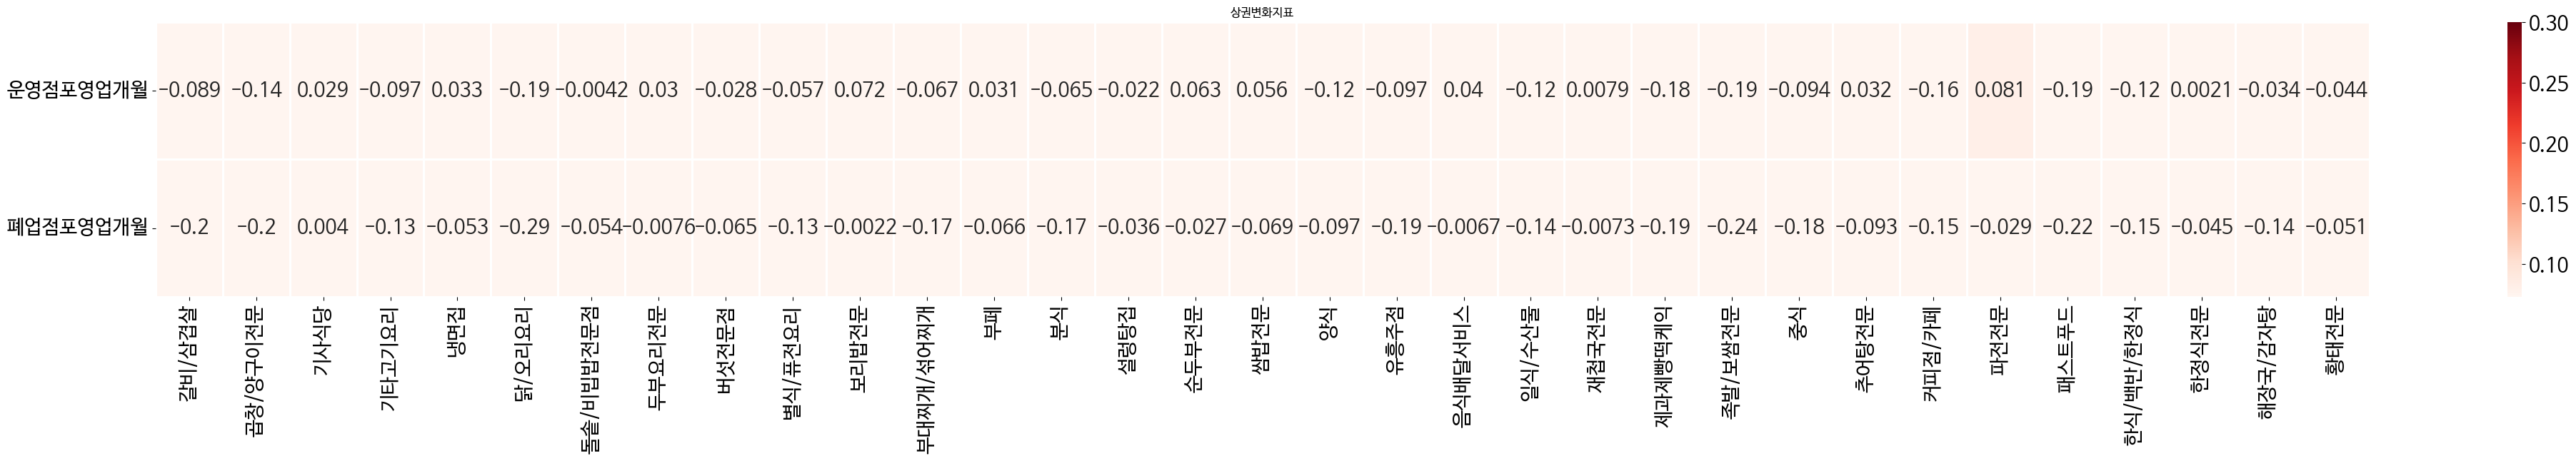

In [29]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 각 업종들과의 상관계수가 0.3 이상인 변수가 존재하지 않는다.  
- 상권변화지표 데이터는 각 업종의 업소 수와 상관관계가 거의 없다고 할 수 있다.
    - 단, 닭/오리요리 전문점의 업소수와 폐업점포영업개월 간의 상관계수가 **-0.293492**라는 점에서 둘은 다소 뚜렷한 음의 상관관계가 있음을 확인할 수 있다.

### **f) 주민등록인구**

In [30]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,0,2,0,703,1134,3081,4020,1419,1530,11887
1,종로구,사직동,13,8,0,4,1,14,1,0,...,1,6,0,532,681,2643,3037,1212,1274,9379
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,1,0,0,121,218,646,814,432,428,2659
3,종로구,부암동,1,1,0,0,1,3,0,0,...,0,0,0,453,844,2575,3184,1311,1223,9590
4,종로구,평창동,4,0,0,0,2,5,0,0,...,0,1,0,1119,1550,4381,5911,2715,2276,17952


In [31]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,-0.014268,-0.051483,-0.011393,-0.056313,-0.021147,0.146562,0.016116,0.047897,0.057073,-0.000214,...,0.077185,-0.008853,0.019977,-0.001666,-0.096266,0.151579,-0.022936,-0.007059,0.027618,0.051245
10대,-0.038729,-0.064929,-0.040479,-0.047294,0.009950,0.151651,0.046895,0.063036,0.023557,-0.000068,...,0.058264,-0.000446,0.013681,0.036779,-0.081246,0.195555,-0.009867,0.029153,-0.007069,0.063330
20 ~ 30대,0.492773,0.403823,0.074455,0.287540,0.173127,0.575368,0.175967,0.157681,0.089542,0.390852,...,0.466045,0.361987,0.174685,0.377301,0.175543,0.528516,0.397930,0.187755,0.375119,0.128423
40 ~ 50대,0.163431,0.112805,0.044423,0.065666,0.079185,0.387502,0.087728,0.155711,0.057870,0.122522,...,0.266450,0.144885,0.164193,0.094402,0.027706,0.301829,0.119951,0.056698,0.187321,0.084305
60대,0.148164,0.137643,0.088676,0.057579,0.080801,0.412832,0.064239,0.183260,0.033632,0.059392,...,0.287364,0.076581,0.261411,-0.029599,0.124282,0.175731,0.040523,-0.008285,0.186956,0.077728
70대 이상,0.126336,0.131257,0.098308,0.038951,0.082382,0.402517,0.066185,0.208483,0.007545,0.065665,...,0.270532,0.063958,0.243760,-0.018686,0.116783,0.168438,0.059500,-0.004285,0.174951,0.088141
총인구,0.261358,0.204737,0.059100,0.127106,0.109060,0.473505,0.116873,0.170793,0.065334,0.197821,...,0.342731,0.196227,0.185827,0.166097,0.084276,0.374213,0.192885,0.088217,0.245651,0.108224


In [32]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.492773
1,곱창/양구이전문,20 ~ 30대,0.403823
2,닭/오리요리,20 ~ 30대,0.575368
3,닭/오리요리,총인구,0.473505
4,닭/오리요리,60대,0.412832
5,닭/오리요리,70대 이상,0.402517
6,닭/오리요리,40 ~ 50대,0.387502
7,별식/퓨전요리,20 ~ 30대,0.390852
8,분식,20 ~ 30대,0.479366
9,분식,총인구,0.316559


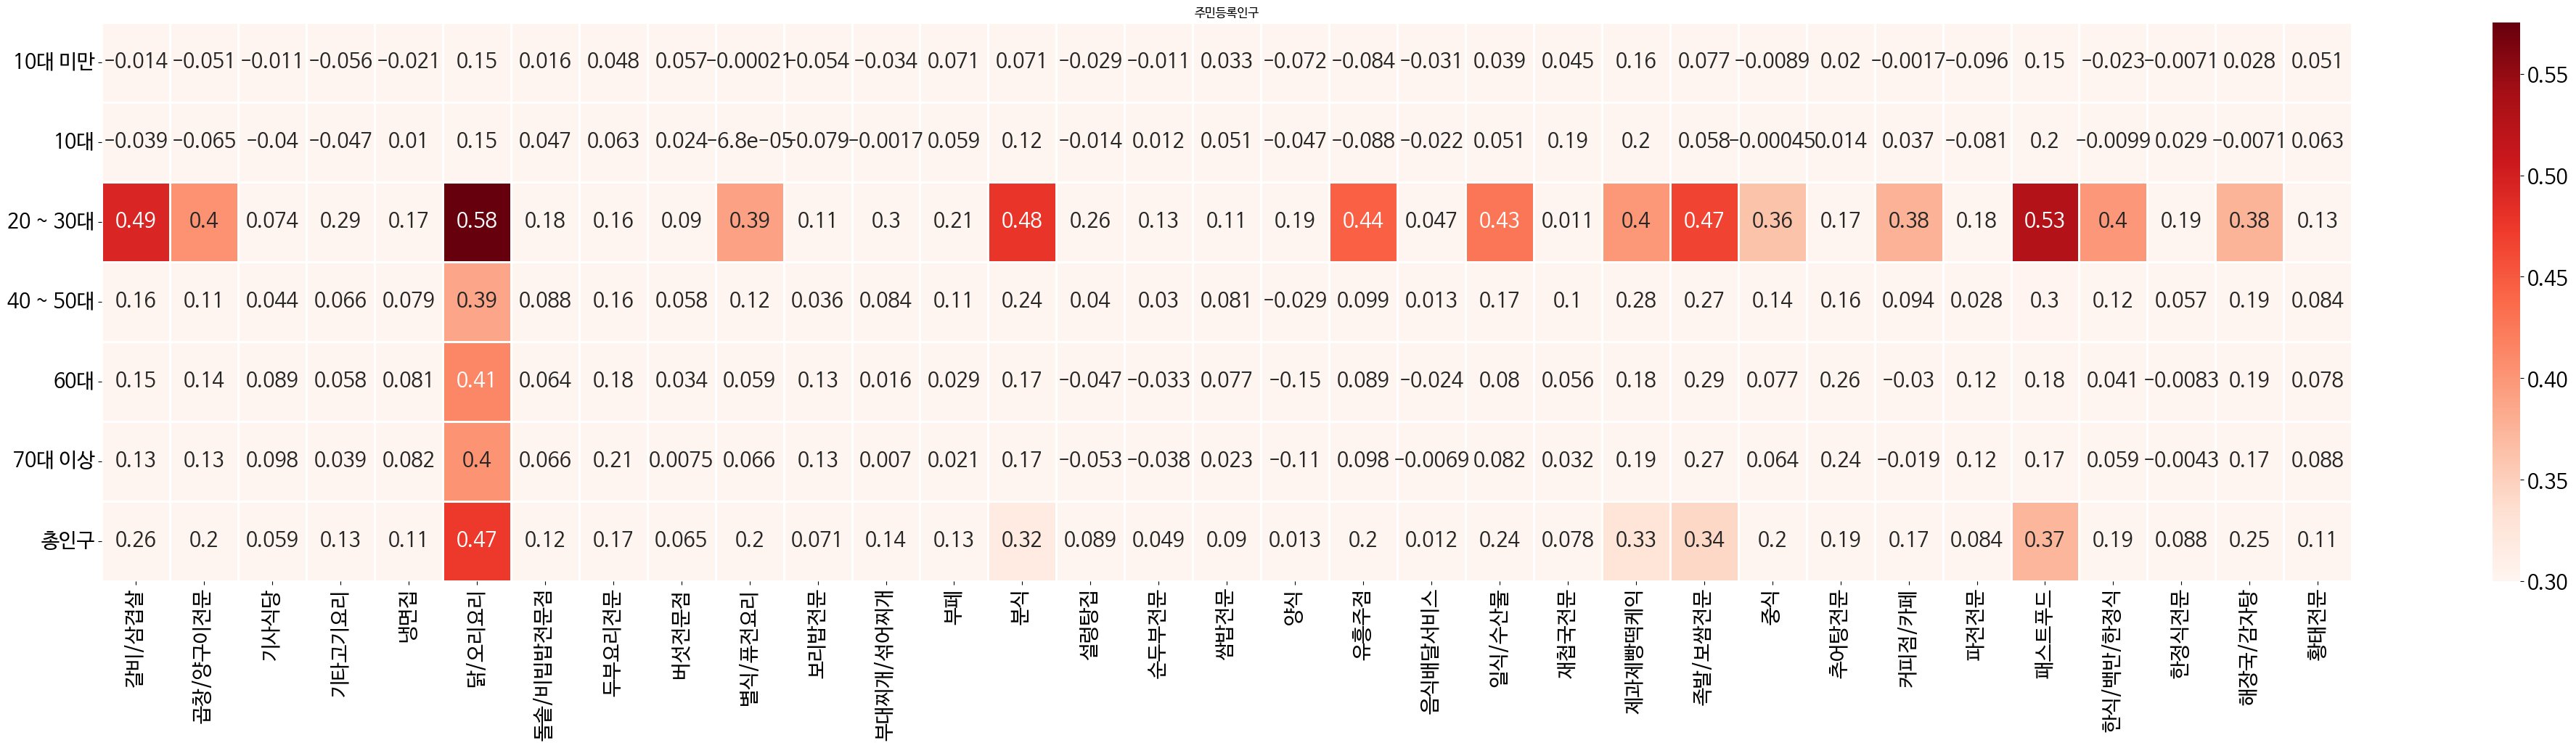

In [33]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [34]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     1
닭/오리요리       5
별식/퓨전요리      1
분식           2
유흥주점         1
일식/수산물       1
제과제빵떡케익      2
족발/보쌈전문      2
중식           1
커피점/카페       1
패스트푸드        3
한식/백반/한정식    1
해장국/감자탕      1
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 상당수의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **g) 지하철**

In [35]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,종로구,청운효자동,4,1,0,0,0,4,0,0,...,1,50,0,7,71,0,2,0,0,0
1,종로구,사직동,13,8,0,4,1,14,1,0,...,1,131,0,14,207,1,6,0,2,0
2,종로구,삼청동,1,0,0,2,2,0,0,0,...,0,95,0,8,49,1,0,0,1,0
3,종로구,부암동,1,1,0,0,1,3,0,0,...,0,54,0,10,27,0,0,0,0,0
4,종로구,평창동,4,0,0,0,2,5,0,0,...,0,51,0,7,41,0,1,0,0,0


In [36]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.346106,0.288762,-0.03534,0.268632,0.282369,0.297784,0.189892,0.082741,0.065845,0.435158,...,0.257981,0.290813,0.022787,0.413833,0.168401,0.359270,0.404281,0.215614,0.329828,0.153635
역(환승역),0.266401,0.257119,-0.00728,0.193893,0.224213,0.215432,0.129087,0.056068,0.117257,0.378951,...,0.222367,0.254995,0.018683,0.350821,0.178828,0.286156,0.352641,0.193088,0.246339,0.109596


In [37]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,역(전체),0.346106
1,별식/퓨전요리,역(전체),0.435158
2,별식/퓨전요리,역(환승역),0.378951
3,부대찌개/섞어찌개,역(전체),0.314371
4,부페,역(전체),0.342663
5,부페,역(환승역),0.308574
6,분식,역(전체),0.396263
7,분식,역(환승역),0.319588
8,설렁탕집,역(전체),0.370843
9,설렁탕집,역(환승역),0.344325


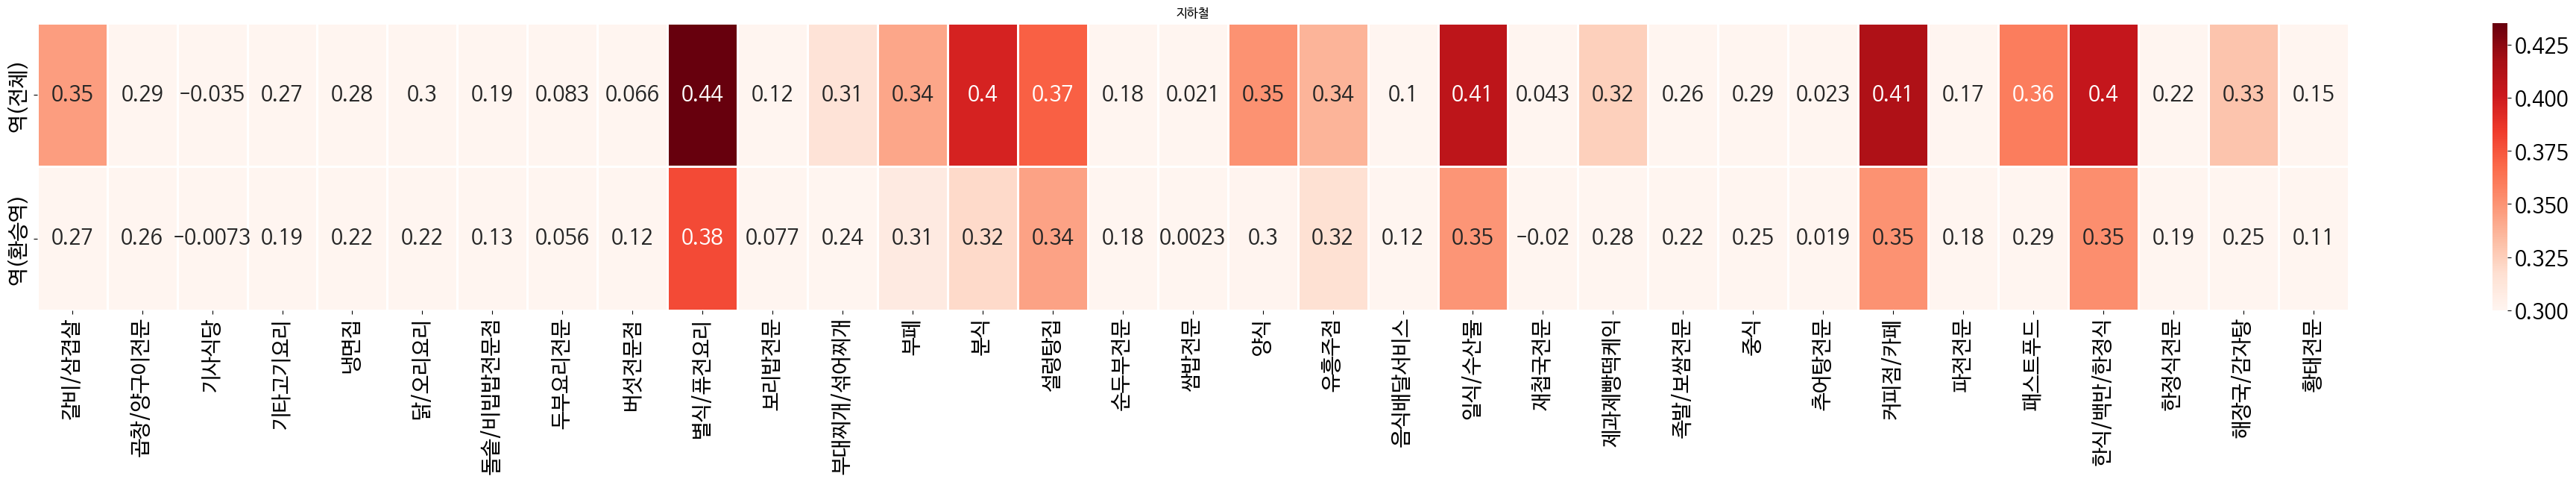

In [38]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [39]:
result_subway.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
별식/퓨전요리      2
부대찌개/섞어찌개    1
부페           2
분식           2
설렁탕집         2
양식           2
유흥주점         2
일식/수산물       2
제과제빵떡케익      1
커피점/카페       2
패스트푸드        1
한식/백반/한정식    2
해장국/감자탕      1
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 지하철 데이터의 경우 상당수의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.